In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='ticks', context='talk')
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point
import fiona
%matplotlib inline

In [168]:
huc8=gpd.read_file(r'J:\Geology\WSGS\GIS\huc_6.shp')

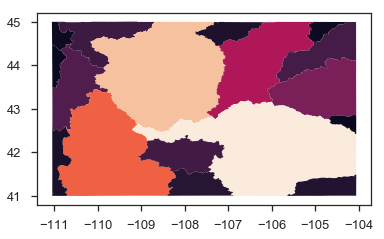

In [169]:
huc8.plot(column='Shape_Area')

In [28]:
df= pd.read_csv(r'M:/critical/imputed.csv')

In [51]:
from geopandas import GeoDataFrame
from shapely.geometry import Point
import fiona

geometry = [Point(xy) for xy in zip(df.longitude, df.latitude)]
crs = {'init': 'epsg:4269'} #http://www.spatialreference.org/ref/epsg/2263/
geo_df = GeoDataFrame(df, crs=crs, geometry=geometry)

geo_df.to_file(driver='ESRI Shapefile', filename='data.shp')

In [52]:
pts=gpd.read_file(r'd:\jupyter\data.shp')

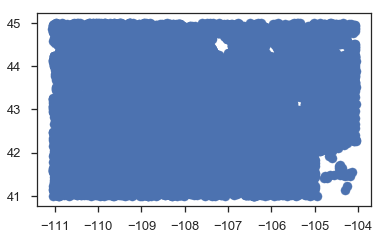

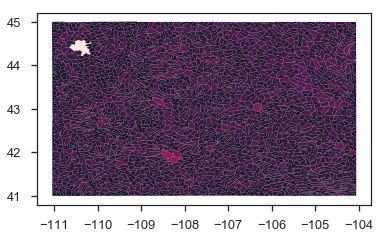

In [53]:
pts.plot()
huc8.plot(column='Shape_Area')

In [54]:
points_with_basin=gpd.sjoin(pts, huc8, how='inner', op='intersects')

In [55]:
points_with_basin.columns

Index(['Unnamed_ 0', 'u_dn_ppm', 'u_fl_ppm', 'ag_ppm', 'al_pct', 'as_ppm',
       'au_ppm', 'b_ppm', 'ba_ppm', 'be_ppm', 'bi_ppm', 'ca_pct', 'cd_ppm',
       'ce_ppm', 'cl_ppm', 'co_ppm', 'cr_ppm', 'cs_ppm', 'cu_ppm', 'dy_ppm',
       'eu_ppm', 'fe_pct', 'hf_ppm', 'k_pct', 'la_ppm', 'li_ppm', 'lu_ppm',
       'mg_pct', 'mn_ppm', 'mo_ppm', 'na_pct', 'nb_ppm', 'ni_ppm', 'p_ppm',
       'pb_ppm', 'rb_ppm', 'sb_ppm', 'sc_ppm', 'se_ppm', 'sm_ppm', 'sn_ppm',
       'sr_ppm', 'ta_ppm', 'tb_ppm', 'th_ppm', 'ti_ppm', 'v_ppm', 'w_ppm',
       'y_ppm', 'yb_ppm', 'zn_ppm', 'zr_ppm', 'longitude', 'latitude',
       'geometry', 'index_right', 'AREA', 'PERIMETER', 'WY_HU12_',
       'WY_HU12_ID', 'HUC_8', 'HUC_10', 'HUC_12', 'ACRES', 'STATES',
       'NCONTRB_A', 'HU_10_DS', 'HU_10_NAME', 'HU_10_MOD', 'HU_10_TYPE',
       'HU_12_DS', 'HU_12_NAME', 'HU_12_MOD', 'HU_12_TYPE', 'HU_2_NAME',
       'HU_4_NAME', 'HU_6_NAME', 'HU_8_NAME', 'Shape_Leng', 'Shape_Area'],
      dtype='object')

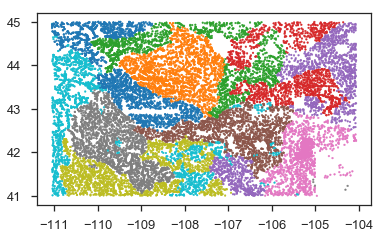

In [77]:
points_with_basin.plot(column='HU_12_DS', s=3)

In [60]:
huc8.columns

Index(['AREA', 'PERIMETER', 'WY_HU12_', 'WY_HU12_ID', 'HUC_8', 'HUC_10',
       'HUC_12', 'ACRES', 'STATES', 'NCONTRB_A', 'HU_10_DS', 'HU_10_NAME',
       'HU_10_MOD', 'HU_10_TYPE', 'HU_12_DS', 'HU_12_NAME', 'HU_12_MOD',
       'HU_12_TYPE', 'HU_2_NAME', 'HU_4_NAME', 'HU_6_NAME', 'HU_8_NAME',
       'Shape_Leng', 'Shape_Area', 'geometry'],
      dtype='object')

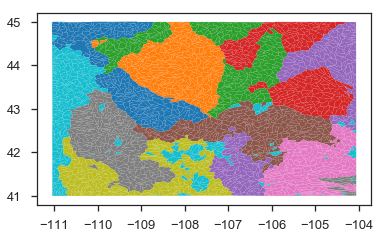

In [76]:
huc8.plot('HU_12_DS')

In [170]:
bedrock=gpd.read_file(r'J:\Geology\WSGS\GIS\bedrock.shp')

In [171]:
bedrock.columns

Index(['Symbol_Ori', 'Unit_Name', 'Unit_Descr', 'Unit_Age', 'Symbol',
       'RuleID_1', 'Shape_Leng', 'Shape_Area', 'geometry'],
      dtype='object')

In [ ]:
test=gpd.overlay(bedrock, huc8, how='intersection')

In [ ]:
#huc8 is comparable to the countries
#test is comparable to country_cores
t2=test[['huc8name', 'formationName']]
t2['area']=test.area

In [ ]:
for i in range(len(huc8)):
    argen=cc2[cc2['name']=='Argentina'].groupby('name_2').sum()
    argarea=countries[countries['name']=='Argentina'].area.values
    (argen/argarea)*100

In [3]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

capitals = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

# Select South Amarica and some columns
countries = world[world['continent'] == "South America"]

countries = countries[['geometry', 'name']]

# Project to crs that uses meters as distance measure
countries = countries.to_crs('+init=epsg:3395')

capitals = capitals.to_crs('+init=epsg:3395')

In [147]:
cc2=country_cores[['name', 'name_2']]
cc2['area']=country_cores.area
cc2

,name,name_2,area
0,Argentina,Santiago,3.474672e+11
1,Chile,Santiago,1.848383e+11
2,Argentina,Montevideo,2.233865e+11
3,Argentina,Montevideo,1.856582e+07
4,Uruguay,Montevideo,1.810873e+11
5,Peru,Quito,8.521896e+08
6,Ecuador,Quito,2.497435e+11
7,Peru,Quito,1.000652e+11
8,Argentina,Buenos Aires,2.427096e+11
9,Uruguay,Montevideo,1.115099e-05


In [154]:
argen=cc2[cc2['name']=='Argentina'].groupby('name_2').sum()

In [163]:
argarea=countries[countries['name']=='Argentina'].area.values

In [165]:
(argen/argarea)*100

,area
name_2,
Asuncion,7.508552
Buenos Aires,5.632170
Montevideo,5.184200
Santiago,8.063111
Sucre,1.260590
